In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df=pd.read_csv("credit_risk_dataset.csv")

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Hnadling Missing Values

In [6]:
df.isnull().sum()/len(df)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [7]:
print("    Only two columns of data contains NaN,person_emp_length contains 2.75% NaN and loan_int_rate contains 9.56% NaN   ")

    Only two columns of data contains NaN,person_emp_length contains 2.75% NaN and loan_int_rate contains 9.56% NaN   


In [8]:
# check the mode, median for the two features
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [9]:
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

# EDA

# Univariate analysis

In [10]:
num_col=df.select_dtypes(include=["int","float"])

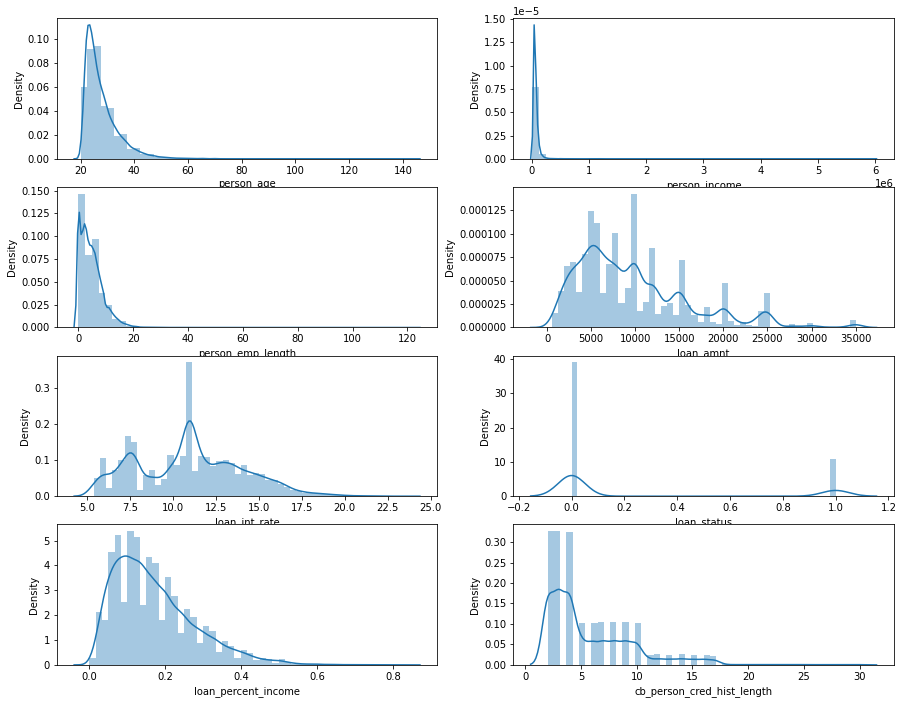

In [11]:
plt.figure(figsize=(15,15))
count=1
for i in num_col:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.show()

In [12]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
print("************************************************OBSERVATIONS**********************************************************\n\n\t\t\tAll of the distributions are positive skewed.\n~ person_age: Most people are 20 to 60 years old. In the following analysis, to be more general, people age > 100 will be droped.\n~ person_emp_length: Most people have less than 40 years of employment. People with employment > 60 years will be droped.\n~ person_income: It seems that there are outliers which has to be removed (> 4 million).\n~ For all other variables, the distribution is more uniform across the whole range, thus they will be kept.")

************************************************OBSERVATIONS**********************************************************

			All of the distributions are positive skewed.
~ person_age: Most people are 20 to 60 years old. In the following analysis, to be more general, people age > 100 will be droped.
~ person_emp_length: Most people have less than 40 years of employment. People with employment > 60 years will be droped.
~ person_income: It seems that there are outliers which has to be removed (> 4 million).
~ For all other variables, the distribution is more uniform across the whole range, thus they will be kept.


# clean the dataset and drop outliers.

In [14]:
cleaned_credit_df = df[df['person_age']<=100]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_emp_length']<=60]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_income']<=4e6]

In [15]:
cleaned_credit_df 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [16]:
cat_cols=cleaned_credit_df.select_dtypes(include="O") 

In [17]:
cat_cols

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


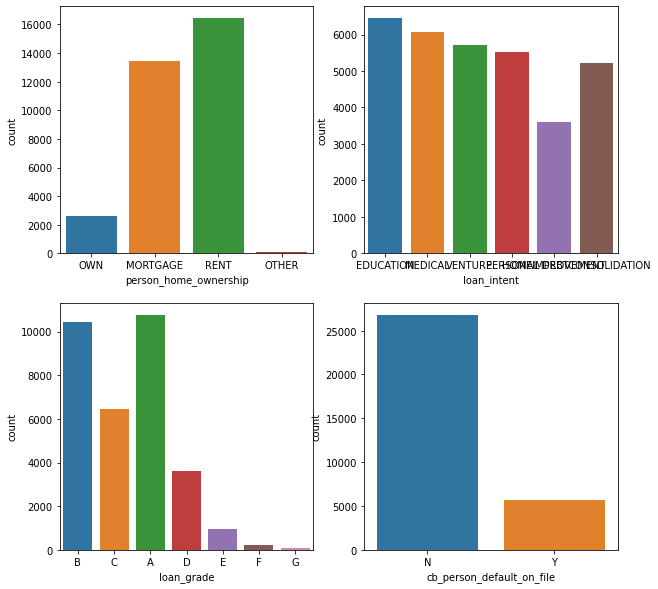

In [18]:
plt.figure(figsize=(10,10))
count=1
for i in cat_cols:
    plt.subplot(2,2,count)
    sns.countplot(cleaned_credit_df[i])
    count+=1
plt.show()

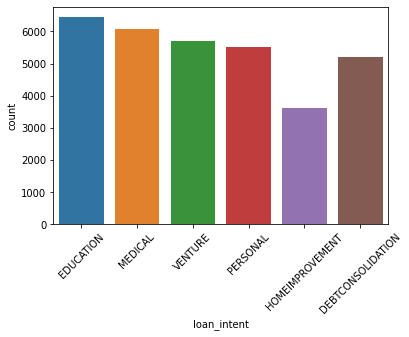

In [19]:
sns.countplot(cleaned_credit_df["loan_intent"])
plt.xticks(rotation=45)
plt.show()

In [20]:
print("*************************************************OBSERVATIONS*******************************************************\n\t\tCount of Rent And Mortgage type of home ownership customers is maximum\n \t\tHighest Loan intent is Education followed by medical\n \t\tHighest customers fall under loan grade A followed by B and least in G")

*************************************************OBSERVATIONS*******************************************************
		Count of Rent And Mortgage type of home ownership customers is maximum
 		Highest Loan intent is Education followed by medical
 		Highest customers fall under loan grade A followed by B and least in G


# BIVARIATE ANALYSIS

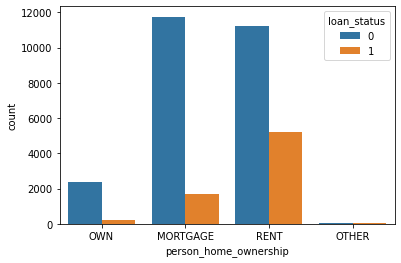

In [21]:
sns.countplot(cleaned_credit_df["person_home_ownership"],hue=cleaned_credit_df["loan_status"])
plt.show()

In [22]:
print("Loans belonging Mortage and own category rarely defaulted. Rent and Other category belonged loans defaulted more compared to them.")

Loans belonging Mortage and own category rarely defaulted. Rent and Other category belonged loans defaulted more compared to them.


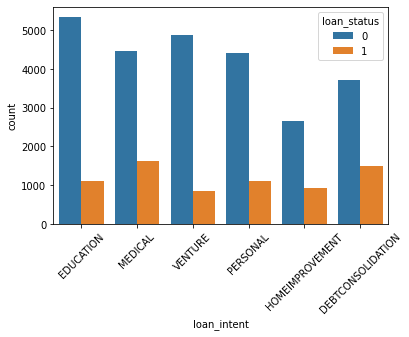

In [23]:
sns.countplot(cleaned_credit_df["loan_intent"],hue=cleaned_credit_df["loan_status"])
plt.xticks(rotation=45)
plt.show()

In [24]:
print("Loans with debt concolidation reasons defaulted the most. Loans with education and venture purposes defaulted the leaset. Overall there is not much variations of default rate among loan_intent categories.")

Loans with debt concolidation reasons defaulted the most. Loans with education and venture purposes defaulted the leaset. Overall there is not much variations of default rate among loan_intent categories.


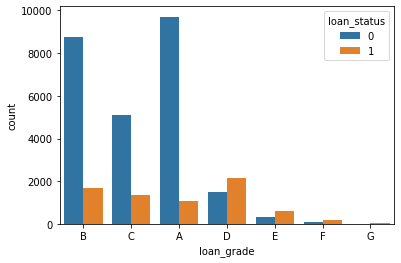

In [25]:
sns.countplot(cleaned_credit_df["loan_grade"],hue=cleaned_credit_df["loan_status"])
plt.show()

In [26]:
print("********************************Loan's default rate from A to G increased respectively***************************")

********************************Loan's default rate from A to G increased respectively***************************


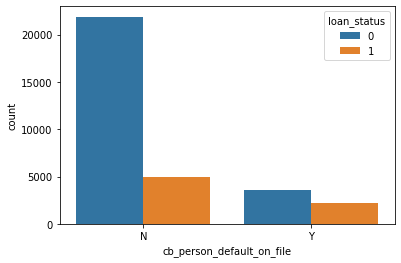

In [27]:
sns.countplot(cleaned_credit_df["cb_person_default_on_file"],hue=cleaned_credit_df["loan_status"])
plt.show()

In [28]:
print("***************Borrowers with previous default record defualted more than no previous default record******************")

***************Borrowers with previous default record defualted more than no previous default record******************


In [29]:
cleaned_credit_df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2


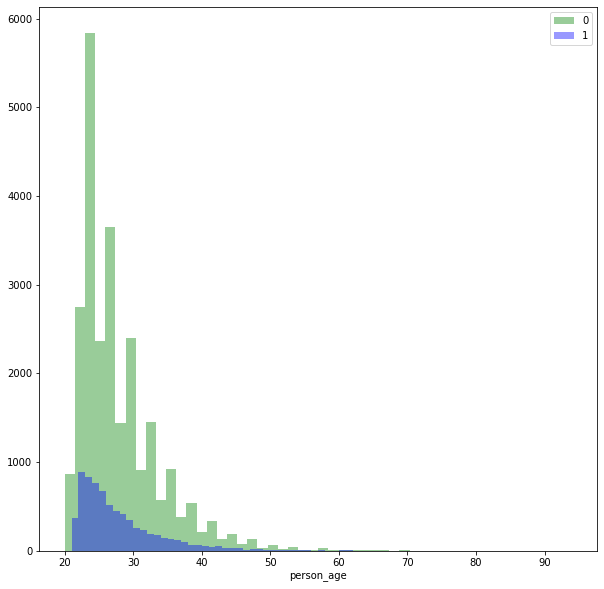

In [30]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["person_age"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["person_age"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [31]:
print("*Overall, person_age variable does not vary with a lot with loan_status categories.***************************")

*Overall, person_age variable does not vary with a lot with loan_status categories.***************************


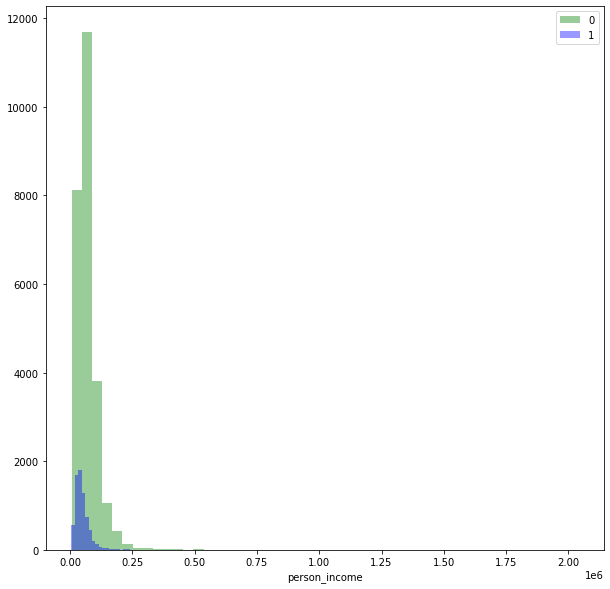

In [32]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["person_income"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["person_income"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [33]:
print("***************************Borrowers with high income default less than those with low income.**************************")

***************************Borrowers with high income default less than those with low income.**************************


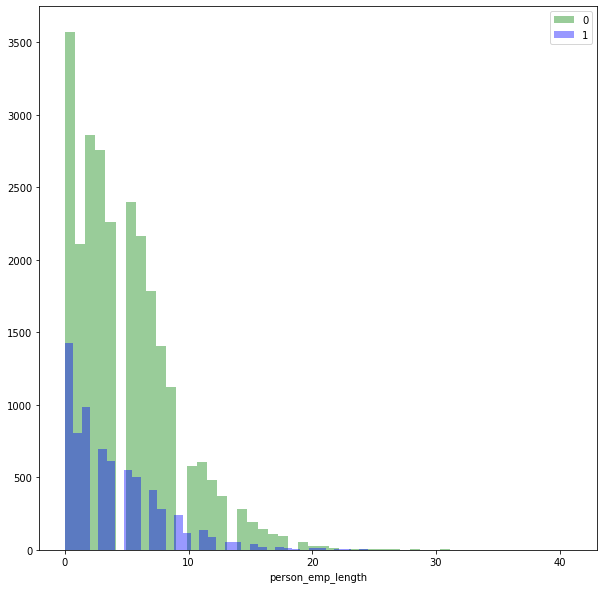

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["person_emp_length"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["person_emp_length"],color="b",label="1",kde=False)
plt.legend()
plt.show()

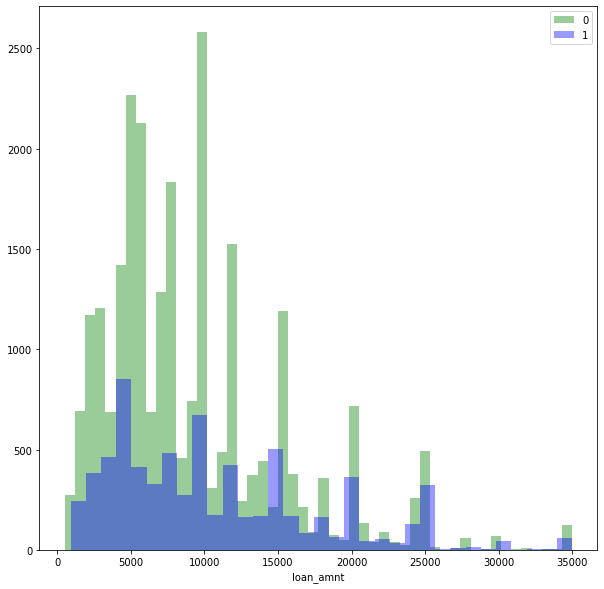

In [35]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["loan_amnt"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["loan_amnt"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [36]:
print("From the distributions, we can see that Default is distributed where loan_amnt is higher. Morever, mean loan_amnt for Default is higher than Not Default. Borrowers with big loan amount default more according to the data.")

From the distributions, we can see that Default is distributed where loan_amnt is higher. Morever, mean loan_amnt for Default is higher than Not Default. Borrowers with big loan amount default more according to the data.


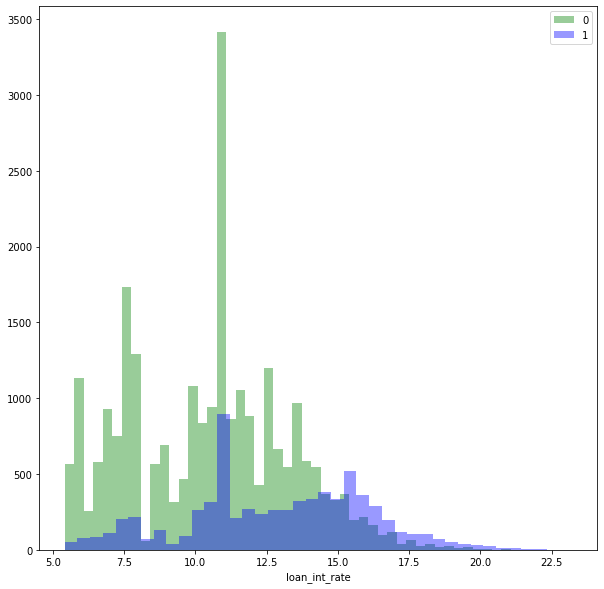

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["loan_int_rate"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["loan_int_rate"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [38]:
print("*****************************Interest rates are also higher for defaulted borrowers*********************************")

*****************************Interest rates are also higher for defaulted borrowers*********************************


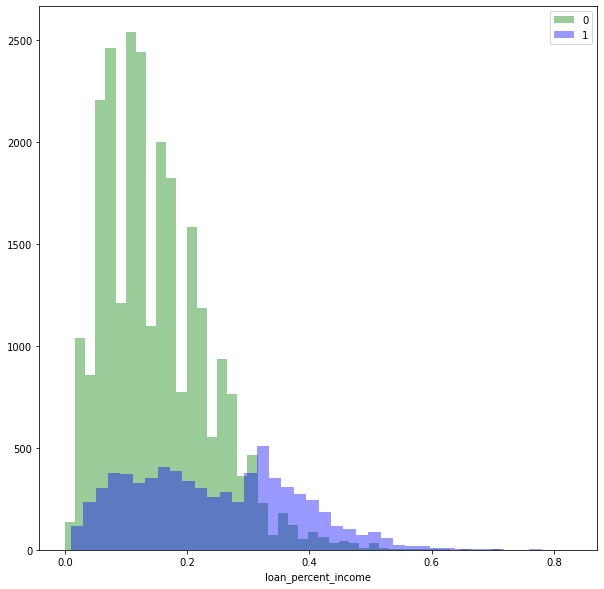

In [39]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["loan_percent_income"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["loan_percent_income"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [40]:
print("**********************loan_percent income is higher for defaulted borrowers.***************************")

**********************loan_percent income is higher for defaulted borrowers.***************************


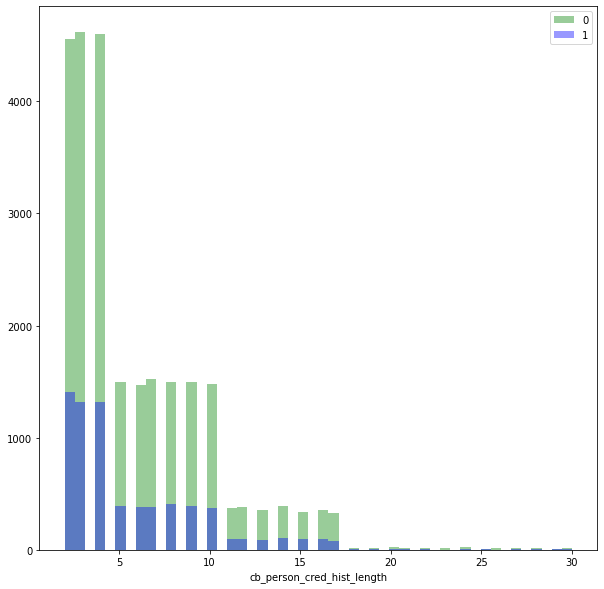

In [41]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==0]["cb_person_cred_hist_length"],color="g",label="0",kde=False)
sns.distplot(cleaned_credit_df[cleaned_credit_df["loan_status"]==1]["cb_person_cred_hist_length"],color="b",label="1",kde=False)
plt.legend()
plt.show()

In [42]:
print("**********************cb_person_cred_hist_length does not vary a lot with each category.******************************")

**********************cb_person_cred_hist_length does not vary a lot with each category.******************************


# SCALING DATASET

# ENCODING DATASET

In [43]:
cleaned_credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [44]:
def home(x):
    if x=="OTHER":
        return(0)
    elif x=="RENT":
        return(1)
    elif x=="MORTGAGE":
        return(2)
    else:
        return(3)


In [45]:
cleaned_credit_df["person_home_ownership"]=cleaned_credit_df["person_home_ownership"].apply(home)

In [46]:
cleaned_credit_df["person_home_ownership"]=cleaned_credit_df["person_home_ownership"].astype(int)

In [47]:
def category(x):
    if x=="A":
        return(0)
    elif x=="B":
        return(1)
    elif x=="C":
        return(2)
    elif x=="D":
        return(3)
    elif x=="E":
        return(4)
    elif x=="F":
        return(5)
    else:
        return(6)

In [48]:
cleaned_credit_df["loan_grade"]=cleaned_credit_df["loan_grade"].apply(category)

In [49]:
cleaned_credit_df["loan_grade"]=cleaned_credit_df["loan_grade"].astype(int)

In [50]:
def default(x):
    if x=='N':
        return(0)
    else:
        return(1)


In [51]:
cleaned_credit_df["cb_person_default_on_file"]=cleaned_credit_df["cb_person_default_on_file"].apply(default)

In [52]:
cleaned_credit_df["cb_person_default_on_file"]=cleaned_credit_df["cb_person_default_on_file"].astype(int)

In [53]:
cleaned_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  int32  
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  int32  
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  int32  
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 2.9+ MB


In [54]:
cleaned_credit_df=pd.get_dummies(cleaned_credit_df,drop_first=True)

In [55]:
cleaned_credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,3,5.0,1,1000,11.14,0,0.10,0,2,1,0,0,0,0
2,25,9600,2,1.0,2,5500,12.87,1,0.57,0,3,0,0,1,0,0
3,23,65500,1,4.0,2,35000,15.23,1,0.53,0,2,0,0,1,0,0
4,24,54400,1,8.0,2,35000,14.27,1,0.55,1,4,0,0,1,0,0
5,21,9900,3,2.0,0,2500,7.14,1,0.25,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,2,5800,13.16,0,0.11,0,30,0,0,0,1,0
32577,54,120000,2,4.0,0,17625,7.49,0,0.15,0,19,0,0,0,1,0
32578,65,76000,1,3.0,1,35000,10.99,1,0.46,0,28,0,1,0,0,0
32579,56,150000,2,5.0,1,15000,11.48,0,0.10,0,26,0,0,0,1,0


<AxesSubplot:>

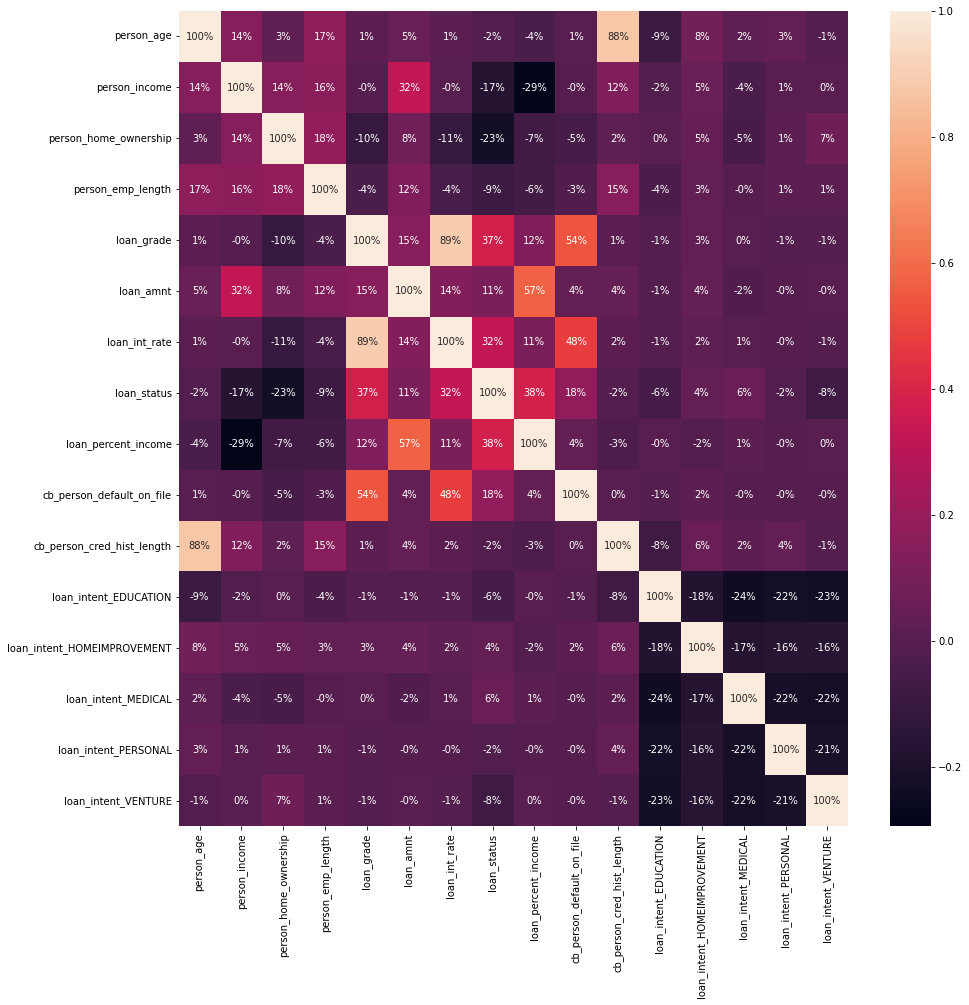

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(cleaned_credit_df.corr(),annot=True,fmt=".0%")

# MODEL BUILDING

In [57]:
X=cleaned_credit_df.drop("loan_status",axis=1)
y=cleaned_credit_df["loan_status"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=25)

In [59]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     17745
           1       0.74      0.17      0.27      5056

    accuracy                           0.80     22801
   macro avg       0.77      0.57      0.58     22801
weighted avg       0.79      0.80      0.75     22801

Test Data
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7722
           1       0.72      0.16      0.27      2051

    accuracy                           0.81      9773
   macro avg       0.77      0.57      0.58      9773
weighted avg       0.80      0.81      0.76      9773



# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
y_pred_train1=clf.predict(X_train)
y_pred_test1=clf.predict(X_test)
print("Train Data")
print(classification_report(y_train,y_pred_train1))
print("Test Data")
print(classification_report(y_test,y_pred_test1))

Train Data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17745
           1       0.77      0.57      0.65      5056

    accuracy                           0.87     22801
   macro avg       0.83      0.76      0.79     22801
weighted avg       0.86      0.87      0.86     22801

Test Data
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7722
           1       0.66      0.50      0.57      2051

    accuracy                           0.84      9773
   macro avg       0.77      0.72      0.74      9773
weighted avg       0.83      0.84      0.83      9773



# RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [78]:
y_train_predict=rf.predict(X_train)
y_test_predict=rf.predict(X_test)

In [79]:
print("Train Data")
print(classification_report(y_train,y_train_predict))
print("Test Data")
print(classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17745
           1       1.00      1.00      1.00      5056

    accuracy                           1.00     22801
   macro avg       1.00      1.00      1.00     22801
weighted avg       1.00      1.00      1.00     22801

Test Data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7722
           1       0.96      0.73      0.83      2051

    accuracy                           0.94      9773
   macro avg       0.95      0.86      0.89      9773
weighted avg       0.94      0.94      0.93      9773



In [80]:
param_grid={
    
     "criterion":["gini","entropy"],
     "min_samples_split":np.arange(2,50,2),
     "n_estimators":(50,100,150,200),
     "max_samples":[0.5,0.75],
     "max_features":[2]
}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
RAND_clf=RandomizedSearchCV(rf,param_distributions=param_grid,cv=5,scoring="f1",n_jobs=-1)
RAND_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': [2],
                                        'max_samples': [0.5, 0.75],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': (50, 100, 150, 200)},
                   scoring='f1')

In [82]:
RAND_clf.best_params_

{'n_estimators': 150,
 'min_samples_split': 6,
 'max_samples': 0.75,
 'max_features': 2,
 'criterion': 'entropy'}

In [84]:
rand_train_pred=RAND_clf.predict(X_train)
rand_test_pred=RAND_clf.predict(X_test)

In [85]:
print("Train Data")
print(classification_report(y_train,rand_train_pred))
print("Test Data")
print(classification_report(y_test,rand_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17745
           1       1.00      0.80      0.88      5056

    accuracy                           0.95     22801
   macro avg       0.97      0.90      0.93     22801
weighted avg       0.96      0.95      0.95     22801

Test Data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7722
           1       0.96      0.72      0.82      2051

    accuracy                           0.93      9773
   macro avg       0.95      0.85      0.89      9773
weighted avg       0.94      0.93      0.93      9773



# XGBOOST

In [63]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
import xgboost as xgb

In [65]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
y_pred_train2=my_model.predict(X_train)
y_pred_test2=my_model.predict(X_test)

In [67]:
print("Train Data")
print(classification_report(y_train,y_pred_train2))
print("Test Data")
print(classification_report(y_test,y_pred_test2))

Train Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17745
           1       0.99      0.82      0.90      5056

    accuracy                           0.96     22801
   macro avg       0.97      0.91      0.94     22801
weighted avg       0.96      0.96      0.96     22801

Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7722
           1       0.95      0.74      0.83      2051

    accuracy                           0.94      9773
   macro avg       0.94      0.87      0.90      9773
weighted avg       0.94      0.94      0.93      9773



In [68]:
param_grid={'n_estimators':np.arange(1,200),
              "learning_rate":(0.1,0.01),
               "gamma":np.arange(1,50)}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
rand_clf=RandomizedSearchCV(my_model,param_distributions=param_grid,cv=5,scoring="f1",n_jobs=-1)
rand_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
                   scoring='f1')

In [70]:
rand_clf.best_params_

{'n_estimators': 68, 'learning_rate': 0.1, 'gamma': 6}

In [71]:
grid_train_pred=rand_clf.predict(X_train)
grid_test_pred=rand_clf.predict(X_test)

In [72]:
print("Train Data")
print(classification_report(y_train,grid_train_pred))
print("Test Data")
print(classification_report(y_test,grid_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17745
           1       0.98      0.73      0.83      5056

    accuracy                           0.94     22801
   macro avg       0.95      0.86      0.90     22801
weighted avg       0.94      0.94      0.93     22801

Test Data
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7722
           1       0.98      0.72      0.83      2051

    accuracy                           0.94      9773
   macro avg       0.95      0.86      0.90      9773
weighted avg       0.94      0.94      0.93      9773

